## Research Question: Is Sweden’s no-lockdown strategy effective in managing the implications of the coronavirus (“COVID-19”) pandemic?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Description of datasets:

**1. COVID-19 reported cases and deaths**
- Dataset retrieved from World Health Organisation ("WHO")
- Consists of 216 countries’ COVID-19 cases and deaths from 4/1/2020 to 6/9/2020 

**2.	COVID-19 Community Mobility Trends**
- Dataset retrieved from Our World in Data 
- Consists of 132 countries’ movement trends from 1/4/2020 to 4/9/2020

**3.	Quarterly GDP per country**
- Retrieved from the Organisation for Economic Co-operation and Development
- Consists of 54 European countries’ GDP from 1947 to 2020

In [2]:
# Load Covid-19 Cases csv file
cases = pd.read_csv('./datasets/WHO-COVID-19-global-data.csv') 
# Load Mobility Report csv file
mob = pd.read_csv('./datasets/changes-visitors-covid.csv')
# Load GDP csv file
gdp = pd.read_csv('./datasets/DP_LIVE_09092020125827339.csv')

# Dataset #1: COVID-19 Reported Cases and Deaths

In [3]:
# Convert string to datetime
cases['Date_reported'] = pd.to_datetime(cases['Date_reported'], format = '%d/%m/%Y')

# Extract required columns
cases = cases[['Date_reported', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]

In [4]:
# Access rows that have Country = Sweden
cases_sweden = cases.loc[cases['Country'] == "Sweden"]

# Access rows that have the 5 selected Countries = Netherlands, Denmark, Finland, Norway, Portugal
countries = ['Netherlands', 'Denmark', 'Finland', 'Norway', 'Portugal']
filt_cases = cases.loc[cases['Country'].isin(countries)]
filt_mean_cases = filt_cases.groupby('Date_reported').mean().reset_index() # Find mean for each 'Date_reported'

In [5]:
# Count of missing values of each column
cases_sweden.isnull().sum()
filt_cases.isnull().sum()

Date_reported        0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

# [Cumulative] COVID-19 Confirmed Cases

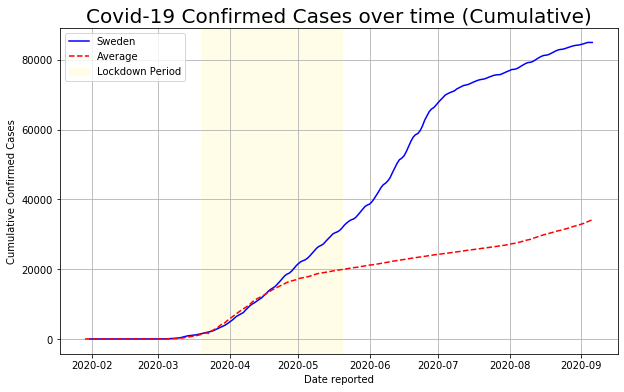

In [6]:
pd.plotting.register_matplotlib_converters()

# Set Figure Size
plt.figure(figsize = (10,6))

# Plot the graph - Confirmed Cases
plt.plot(cases_sweden['Date_reported'], cases_sweden['Cumulative_cases'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_cases['Date_reported'], filt_mean_cases['Cumulative_cases'], 
         label = 'Average', color = 'red', linestyle = 'dashed')

# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')

# Formatting of graph
plt.title('Covid-19 Confirmed Cases over time (Cumulative)', size = 20)
plt.xlabel('Date reported') 
plt.ylabel('Cumulative Confirmed Cases')
plt.legend()
plt.grid()

# [Cumulative] COVID-19 Death Rates

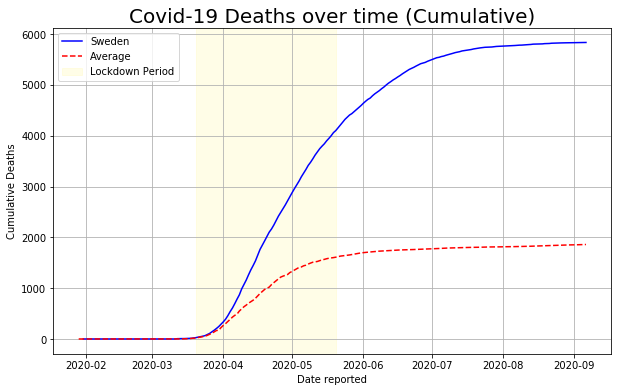

In [7]:
# Set Figure Size
plt.figure(figsize = (10,6))

# Plot the graph - Deaths
plt.plot(cases_sweden['Date_reported'], cases_sweden['Cumulative_deaths'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_cases['Date_reported'], filt_mean_cases['Cumulative_deaths'], 
         label = 'Average', color = 'red', linestyle = 'dashed')

# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')

# Formatting of graph
plt.title('Covid-19 Deaths over time (Cumulative)', size = 20)
plt.xlabel('Date reported') 
plt.ylabel('Cumulative Deaths')
plt.legend()
plt.grid()

**Insights:**
- When observing the (red dotted) curve for the average of 5 countries, the flattening of curve is observed right after the lockdown
- Shows that the **lockdown is effective** in reducing both the total number of COVID-19 cases and deaths


- Sweden reached the flattening of curve at a later time than the average of 5 other countries, even though the increase in the number of COVID-19 cases and deaths started around the same time
- Sweden’s total number of cumulative cases and deaths are significantly greater than its counterparts

# [Daily] COVID-19

In [8]:
# Identification of outliers
filt_cases.loc[filt_cases['New_cases'] < 0]

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
27011,2020-03-23,Norway,-1801.0,125.0,0.0,7.0
29159,2020-05-03,Portugal,-161.0,25190.0,16.0,1023.0


# [Daily] COVID-19 Confirmed Cases - Bar Chart

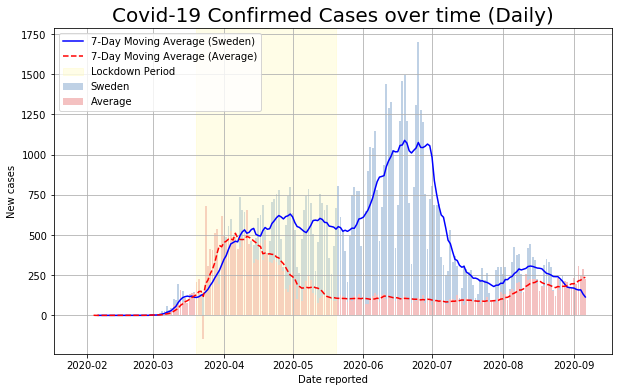

In [9]:
# Set Figure Size
plt.figure(figsize = (10,6))

# Plot bar graph - Confirmed Cases
plt.bar(cases_sweden['Date_reported'], cases_sweden['New_cases'], 
        label = 'Sweden', color = '#BFD1E5')
plt.plot(cases_sweden['Date_reported'], cases_sweden['New_cases'].rolling(7).mean(), 
         label = '7-Day Moving Average (Sweden)', color = 'blue') # 7 Day Moving Average

plt.bar(filt_mean_cases['Date_reported'], filt_mean_cases['New_cases'], 
        label = 'Average', color = '#f4c1c1')
plt.plot(filt_mean_cases['Date_reported'], filt_mean_cases['New_cases'].rolling(7).mean(), 
         label = '7-Day Moving Average (Average)', color = 'red', linestyle = 'dashed') # 7 Day Moving Average

# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')

# Formatting of graph
plt.title('Covid-19 Confirmed Cases over time (Daily)', size = 20)
plt.xlabel('Date reported') 
plt.ylabel('New cases')
plt.legend()
plt.grid()

**Insights:**
- The surge in Sweden's daily confirmed cases from June to July is likely **due to increased testing**
- Afterwards, Sweden's cases dropped significantly from July to August
- Sweden Government had issued reccomendations its citizens to work from home and refrain from non-essential travel
- Therefore, this **subsequent drop in numbers could be accredited to the conviction by the Swedes to voluntarily adopt social distancing and their emphasis on personal responsibility**


- Sweden **took a longer time** to suppress its daily number of COVID-19 cases than the average of 5 other countries

# [Daily] COVID-19 Confirmed Cases -  Box Plot

Text(0, 0.5, 'New cases')

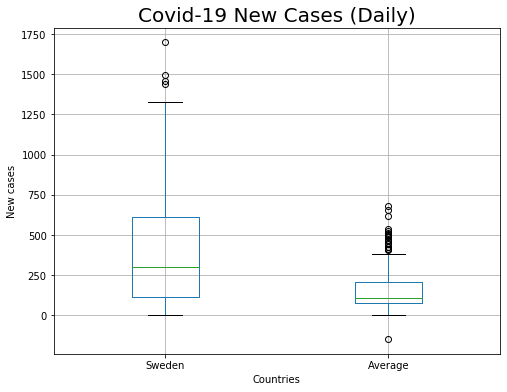

In [10]:
# Set Figure Size
plt.figure(figsize = (8,6))

# Concatenate 2 dataframes + Plot box plot
new_cases = pd.concat([cases_sweden['New_cases'], filt_mean_cases['New_cases']], axis = 1).boxplot(widths = 0.3)

# Formatting of graph
plt.title('Covid-19 New Cases (Daily)', size = 20)
plt.xticks(ticks = [1,2], labels = ['Sweden', 'Average'])
plt.xlabel('Countries') 
plt.ylabel('New cases')

# [Daily] COVID-19 Death Rates - Bar Chart

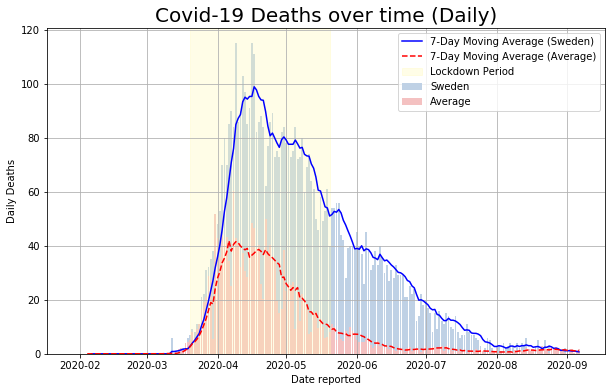

In [11]:
# Set Figure Size
plt.figure(figsize = (10,6))

# Plot the graph - Death Rate
plt.bar(cases_sweden['Date_reported'], cases_sweden['New_deaths'], 
        label = 'Sweden', color = '#BFD1E5')
plt.plot(cases_sweden['Date_reported'], cases_sweden['New_deaths'].rolling(7).mean(), 
         label = '7-Day Moving Average (Sweden)', color = 'blue') # 7 Day Moving Average

plt.bar(filt_mean_cases['Date_reported'], filt_mean_cases['New_deaths'], 
        label = 'Average', color = '#f4c1c1')
plt.plot(filt_mean_cases['Date_reported'], filt_mean_cases['New_deaths'].rolling(7).mean(), 
         label = '7-Day Moving Average (Average)', color = 'red', linestyle = 'dashed') # 7 Day Moving Average

# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')

# Formatting of graph
plt.title('Covid-19 Deaths over time (Daily)', size = 20)
plt.xlabel('Date reported') 
plt.ylabel('Daily Deaths')
plt.legend()
plt.grid()

# [Daily] COVID-19 Death Rates - Box Plot

Text(0, 0.5, 'New Deaths')

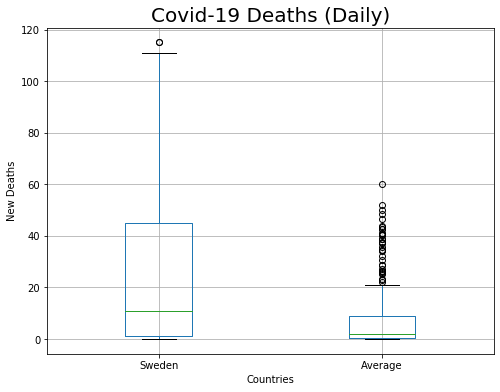

In [12]:
# Set Figure Size
plt.figure(figsize = (8,6))

# Concatenate 2 dataframes + Plot box plot
new_cases = pd.concat([cases_sweden['New_deaths'], filt_mean_cases['New_deaths']], axis = 1).boxplot(widths = 0.3)

# Formatting of graph
plt.title('Covid-19 Deaths (Daily)', size = 20)
plt.xticks(ticks = [1,2], labels = ['Sweden', 'Average'])
plt.xlabel('Countries') 
plt.ylabel('New Deaths')

# Dataset #2: Gross Domestic Product (GDP)

In [13]:
# Extract required columns
gdp = gdp[['LOCATION', 'SUBJECT', 'MEASURE', 'TIME', 'Value']]

# Rename columns
gdp.rename(columns = {'LOCATION': 'Country', 
                      'SUBJECT': 'Subject',
                      'MEASURE': 'Measure',
                      'TIME': 'Quarterly Period'}, inplace = True)

In [14]:
# Access rows that have Country = Sweden and its required fields
gdp_sweden = gdp.loc[
    (gdp['Country'] == "SWE") & 
    (gdp['Subject'] == 'TOT') & 
    (gdp['Measure'] == 'PC_CHGPP') & # Percentage change from previous period
    (gdp['Quarterly Period'] >= '2019-Q1')]

# Access rows that have the 5 selected Countries = Netherlands, Denmark, Finland, Norway, Portugal
countries_gdp = ['NLD', 'DNK', 'FIN', 'NOR', 'PRT']
filt_gdp = gdp.loc[gdp['Country'].isin(countries_gdp)]

# Access required fields
filt_mean_gdp = filt_gdp.loc[
    (gdp['Subject'] == 'TOT') & 
    (gdp['Measure'] == 'PC_CHGPP') & # Percentage change from previous period
    (gdp['Quarterly Period'] >= '2019-Q1')]

filt_mean_gdp = filt_mean_gdp.groupby('Quarterly Period').mean().reset_index() # Find mean for each 'Date'

In [15]:
# Count of missing values of each column
gdp_sweden.isnull().sum()
filt_mean_gdp.isnull().sum()

Quarterly Period    0
Value               0
dtype: int64

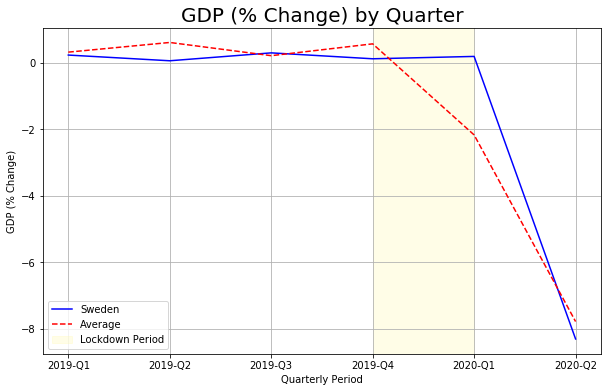

In [16]:
# Set Figure Size
plt.figure(figsize = (10,6))

# Plot the graph - GDP
plt.plot(gdp_sweden['Quarterly Period'], gdp_sweden['Value'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_gdp['Quarterly Period'], filt_mean_gdp['Value'], 
         label = 'Average', color = 'red', linestyle = 'dashed')

# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2019-Q4', '2020-Q1', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')

# Formatting of graph
plt.title('GDP (% Change) by Quarter', size = 20)
plt.xlabel('Quarterly Period') 
plt.ylabel('GDP (% Change)')
plt.legend()
plt.grid()

**Insights:**
- Sweden’s **GDP decreased at a later date** than its counterparts
- **Sweden's no-lockdown policy did not demonstrate its ability to protect its GDP and the drop in GDP is bound to occur regardless of the lockdown**

# Dataset #3: COVID-19 Community Mobility Trends

In [17]:
# Convert string to datetime
mob['Date'] = pd.to_datetime(mob['Date'])

# Drop unnecessary column
mob.drop(['Code'], axis = 1, inplace = True)

In [18]:
# Access rows that have Country = Sweden
mob_sweden = mob.loc[mob['Entity'] == "Sweden"]

# Access rows that have the 5 selected Countries = Netherlands, Denmark, Finland, Norway, Portugal
countries = ['Netherlands', 'Denmark', 'Finland', 'Norway', 'Portugal']
filt_mob = mob.loc[mob['Entity'].isin(countries)]
filt_mean_mob = filt_mob.groupby('Date').mean().reset_index() # Find mean for each 'Date'

In [19]:
# Count of missing values of each column
mob_sweden.isnull().sum()
filt_mob.isnull().sum()

Entity                           0
Date                             0
Retail & Recreation (%)          0
Grocery & Pharmacy Stores (%)    0
Residential (%)                  0
Transit Stations (%)             0
Parks (%)                        0
Workplaces (%)                   0
dtype: int64

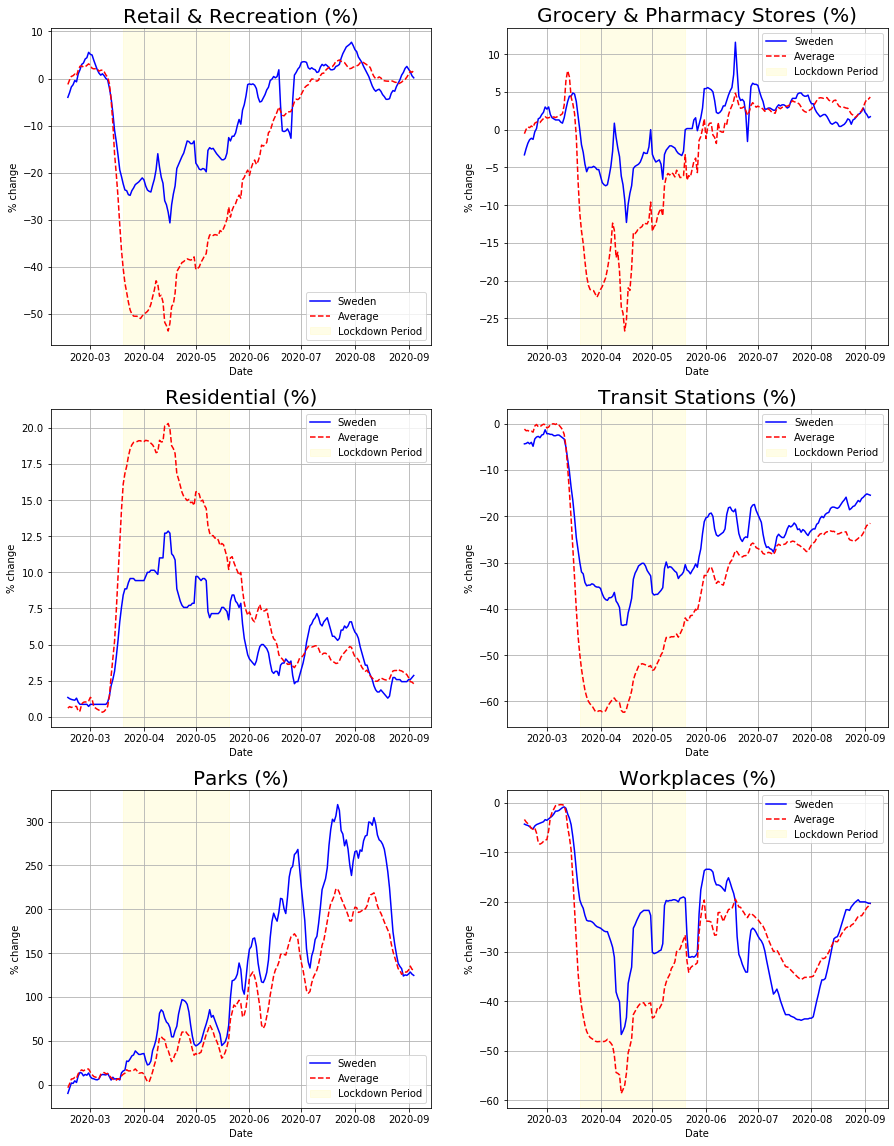

In [20]:
# Set Figure Size
plt.figure(figsize = (15,8))

# Formatting of graph
plt.subplots_adjust(top = 2)
plt.title ('Mobility trend over time')

# Plot Retail & Recreation subgraph 
plt.subplot(3, 2, 1)
plt.plot(mob_sweden['Date'], mob_sweden['Retail & Recreation (%)'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_mob['Date'], filt_mean_mob['Retail & Recreation (%)'], 
         label = 'Average', color = 'red', linestyle = 'dashed')
# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')
# Formatting of subgraph
plt.title('Retail & Recreation (%)', size = 20)
plt.xlabel('Date') 
plt.ylabel('% change') 
plt.legend()
plt.grid()

# Plot Grocery & Pharmacy Stores subgraph 
plt.subplot(3, 2, 2)
plt.plot(mob_sweden['Date'], mob_sweden['Grocery & Pharmacy Stores (%)'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_mob['Date'], filt_mean_mob['Grocery & Pharmacy Stores (%)'], 
         label = 'Average', color = 'red', linestyle = 'dashed')
# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')
# Formatting of subgraph
plt.title('Grocery & Pharmacy Stores (%)', size = 20)
plt.xlabel('Date') 
plt.ylabel('% change') 
plt.legend()
plt.grid()

# Plot Residential subgraph 
plt.subplot(3, 2, 3)
plt.plot(mob_sweden['Date'], mob_sweden['Residential (%)'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_mob['Date'], filt_mean_mob['Residential (%)'], 
         label = 'Average', color = 'red', linestyle = 'dashed')
# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')
# Formatting of subgraph
plt.title('Residential (%)', size = 20)
plt.xlabel('Date') 
plt.ylabel('% change') 
plt.legend()
plt.grid()

# Plot Transit Stations subgraph
plt.subplot(3, 2, 4)
plt.plot(mob_sweden['Date'], mob_sweden['Transit Stations (%)'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_mob['Date'], filt_mean_mob['Transit Stations (%)'], 
         label = 'Average', color = 'red', linestyle = 'dashed')
# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')
# Formatting of subgraph
plt.title('Transit Stations (%)', size = 20)
plt.xlabel('Date') 
plt.ylabel('% change') 
plt.legend()
plt.grid()

# Plot Parks subgraph
plt.subplot(3, 2, 5)
plt.plot(mob_sweden['Date'], mob_sweden['Parks (%)'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_mob['Date'], filt_mean_mob['Parks (%)'], 
         label = 'Average', color = 'red', linestyle = 'dashed')
# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')
# Formatting of subgraph
plt.title('Parks (%)', size = 20)
plt.xlabel('Date') 
plt.ylabel('% change') 
plt.legend()
plt.grid()

# Plot Workplaces subgraph
plt.subplot(3, 2, 6)
plt.plot(mob_sweden['Date'], mob_sweden['Workplaces (%)'], 
         label = 'Sweden', color = 'blue')
plt.plot(filt_mean_mob['Date'], filt_mean_mob['Workplaces (%)'], 
         label = 'Average', color = 'red', linestyle = 'dashed')
# Set vertical rectangle across the axes of plot to represent 60-day Lockdown period
plt.axvspan('2020-03-20', '2020-05-20', color='#FFFAB2', alpha = 0.3, label = 'Lockdown Period')
# Formatting of subgraph
plt.title('Workplaces (%)', size = 20)
plt.xlabel('Date') 
plt.ylabel('% change') 
plt.legend()
plt.grid()


**Insights:**
- Following the lockdown, it is observed that the **average of 5 countries possess lesser movement within the community**, which results in a lower number of COVID-19 cases and lower number of COVID-19 deaths
- This implies that a **lockdown is effective** in controlling the number of COVID-19 cases and deaths due to lower community mobility

**Limitations in research:**
- Research did not examine the psychological and environmental impacts of the lockdown
- Positive outcomes observed from the average of 5 countries (e.g., lower COVID-19 cases and deaths) cannot be said to be 100% owing to the lockdown
- As the COVID-19 crisis is still ongoing, it **could be too early to fully establish the effectiveness of the lockdown**, with many anticipate the possibility of a second wave of the disease